In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [132]:
item_cat=pd.read_csv("item_categories.csv")
item=pd.read_csv("items.csv")
sales = pd.read_csv("sales_train.csv.gz")
# sub=pd.read_csv("sample_submission.csv.gz")
shops=pd.read_csv("shops.csv")
test=pd.read_csv("test.csv.gz")

In [3]:
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [4]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


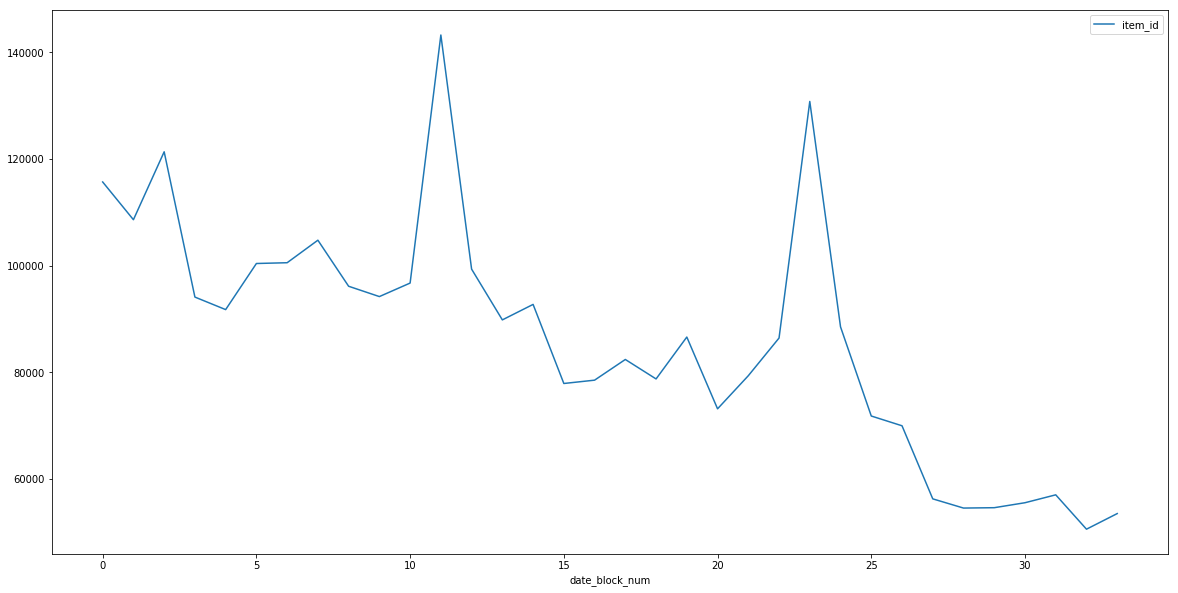

In [5]:
# 월별 item 판매 수
df = pd.DataFrame(sales.groupby(['date_block_num'])['item_id'].count())
df.plot(figsize=(20,10))
### 11과 23에 이상값을 보임 --> 11은 13년도 말, 12또한 14년도 말

In [6]:
sales[sales['date_block_num']==11].head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1124316,04.12.2013,11,25,17769,199.0,1.0
1124317,15.12.2013,11,25,18016,500.0,1.0
1124318,22.12.2013,11,25,17763,399.0,1.0
1124319,31.12.2013,11,25,17760,3250.0,1.0
1124320,18.12.2013,11,25,17763,398.5,1.0


In [7]:
sales[sales['date_block_num']==23].head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2192637,24.12.2014,23,42,17279,299.0,1.0
2192638,27.12.2014,23,42,17315,399.0,1.0
2192639,24.12.2014,23,42,17315,399.0,1.0
2192640,21.12.2014,23,42,17315,399.0,1.0
2192641,20.12.2014,23,42,17315,399.0,2.0


In [8]:
# sales[sales['date_block_num']==10].head()

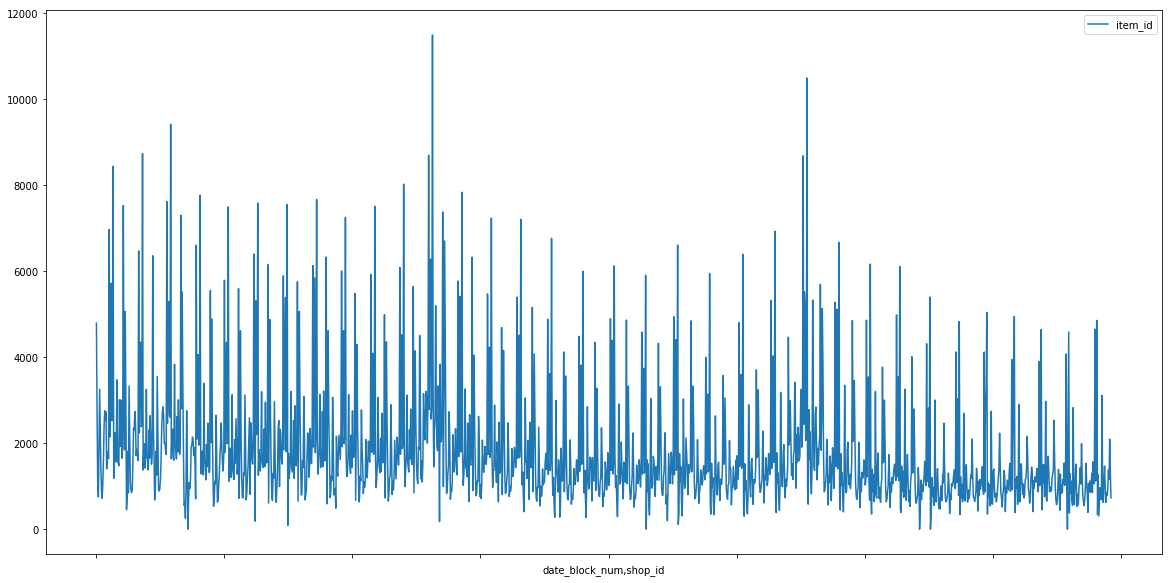

In [9]:
# 월별 shop_id 판매 수
df = pd.DataFrame(sales.groupby(['date_block_num','shop_id'])['item_id'].count())
df.plot(figsize=(20,10))

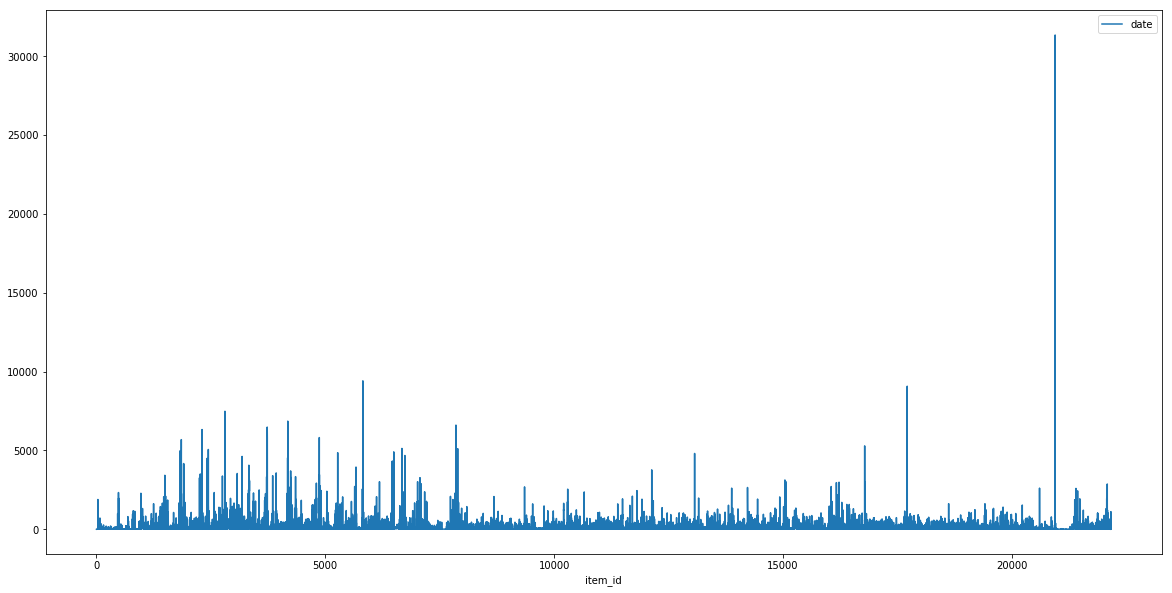

In [10]:
# 3년간 item_id 판매 수
df = pd.DataFrame(sales.groupby(['item_id'])['date'].count())
df.plot(figsize=(20,10))

In [11]:
pd.DataFrame(sales.groupby(['item_id'])['date'].count()).sort_values(by=['date'], ascending=False)[:5]

,date
item_id,
20949,31340
5822,9408
17717,9067
2808,7479
4181,6853


In [12]:
item[item['item_id']==20949]
# Company T-shirt packs are white (34*42)

,item_name,item_id,item_category_id
20949,Фирменный пакет майка 1С Интерес белый (34*42)...,20949,71


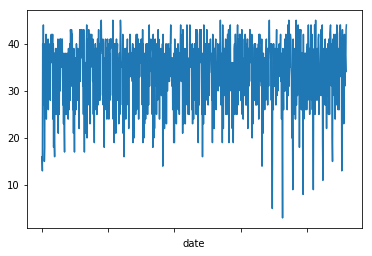

In [13]:
df = sales[sales['item_id'] == 20949].groupby(['date'])['date_block_num'].count()
df.plot()

In [14]:
sales_13 = sales[:1267562] #13년도 데이터
sales_14 = sales[1267562:2323423] #14년도 데이터
sales_15 = sales[2323423:] #15년도 10월까지 데이터

In [15]:
# 13년도 월별 item 판매 수
df_13 = pd.DataFrame(sales_13.groupby(['date_block_num'])['item_id'].count())
# 14년도 월별 item 판매 수
df_14 = pd.DataFrame(sales_14.groupby(['date_block_num'])['item_id'].count())
# 15년도 월별 item 판매 수
df_15 = pd.DataFrame(sales_15.groupby(['date_block_num'])['item_id'].count())

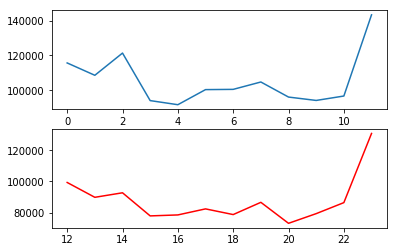

In [16]:
plt.subplot(211)
plt.plot(df_13)

plt.subplot(212)
plt.plot(df_14, 'r')

# plt.subplot(313)
# plt.plot(df_15, 'g')

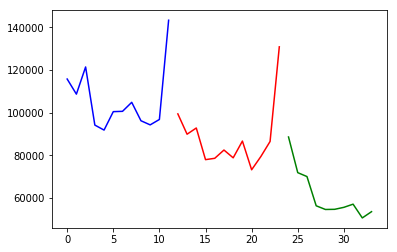

In [17]:
plt.plot(df_13,'b', df_14, 'r', df_15, 'g')

In [18]:
df_15 #date_block_num이 27이후 데이터 사용

,item_id
date_block_num,
24,88522
25,71808
26,69977
27,56274
28,54548
29,54617
30,55549
31,57029
32,50588


In [19]:
x_train = sales[2553730:]
x_train = x_train.drop(columns=['date_block_num', 'date','item_price'])
y_train = x_train.pop('item_cnt_day')
x_train.head()

,shop_id,item_id
2553730,27,12020
2553731,29,2734
2553732,29,2470
2553733,29,2698
2553734,29,2698


In [20]:
x_train.shape, y_train.shape

((382119, 2), (382119,))

In [21]:
x_train = x_train.as_matrix()
y_train = y_train.as_matrix()
test_id_idx = test.pop('ID')
x_test = test.as_matrix()

C:\ProgramData\Miniconda3\envs\inflearn\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Miniconda3\envs\inflearn\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\ProgramData\Miniconda3\envs\inflearn\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [22]:
x_train.shape, y_train.shape, x_test.shape

((382119, 2), (382119,), (214200, 2))

In [23]:
# x_train = sales_month
# y_train = x_train.pop('item_cnt_day')

In [24]:
# from keras.models import Sequential
# from keras.layers import Dense,Dropout
# from keras.layers import LSTM
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import mean_squared_error

In [25]:
# model = Sequential()
# model.add(Dense(8, input_dim=2, activation='relu'))
# model.add(Dense(1))
# model.compile(loss='mean_squared_error', optimizer='adam')
# model.fit(x_train, y_train, epochs=200, batch_size=2, verbose=2)

### Build Model

In [26]:
from sklearn import linear_model

In [27]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
# Make predictions using the testing set
submit = pd.DataFrame({'ID': test_id_idx, 'item_cnt_month': regr.predict(x_test)})
submit.head()

,ID,item_cnt_month
0,0,1.310377
1,1,1.311810
2,2,1.311369
3,3,1.311364
4,4,1.311546


In [29]:
submit.to_csv('submission_part_data_day.csv', index=False)
# 제출값 1.57551

### LSTM TS Regression

In [45]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation, ThresholdedReLU, MaxPooling2D, Embedding, Dropout
from keras.optimizers import Adam, SGD, RMSprop
from keras import backend as K
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
import gc
import matplotlib.pyplot as plt
import time
from datetime import datetime

In [87]:
sales[:3]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.0,1.0
1,03.01.2013,0,25,2552,899.0,1.0
2,05.01.2013,0,25,2552,899.0,-1.0


In [107]:
df = sales.groupby([sales.date.map(lambda x: datetime.strptime(x,'%d.%m.%Y').strftime('%Y-%m')),'item_id','shop_id']).sum().reset_index()
df = df[['date','item_id','shop_id','item_cnt_day']]
df["item_cnt_day"].clip(0.,20.,inplace=True)

In [108]:
df.head()

,date,item_id,shop_id,item_cnt_day
0,2013-01,19,25,1.0
1,2013-01,27,1,1.0
2,2013-01,27,2,1.0
3,2013-01,27,10,1.0
4,2013-01,27,19,1.0


In [109]:
df = df.pivot_table(index=['item_id','shop_id'], columns='date',values='item_cnt_day',fill_value=0).reset_index()

In [112]:
df.head()

date,item_id,shop_id,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,...,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10
0,0,54,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,55,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,54,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,54,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,54,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
test=pd.read_csv("test.csv.gz")
test_df = pd.merge(test,df,on=['item_id','shop_id'], how='left').fillna(0)
test_df.head()

,ID,shop_id,item_id,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,...,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [124]:
test_df = test_df.drop(labels=['ID','item_id','shop_id'],axis=1)
test_df.head()

,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,...,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [136]:
TARGET = '2015-10'
y_train = test_df[TARGET]
X_train = test_df.drop(labels=[TARGET], axis=1)

print(y_train.shape)
print(X_train.shape)
X_train.head()

(214200,)
(214200, 33)


,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,...,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [137]:
X_train = X_train.as_matrix()
X_train = X_train.reshape((214200, 33, 1))

y_train = y_train.as_matrix()
y_train = y_train.reshape(214200, 1)

print(y_train.shape)
print(X_train.shape)

X_train[:1]

(214200, 1)
(214200, 33, 1)


C:\ProgramData\Miniconda3\envs\inflearn\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Miniconda3\envs\inflearn\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


array([[[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [2.],
        [2.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [3.],
        [1.]]])

In [139]:
X_test = test_df.drop(labels=['2013-01'],axis=1)
X_test = X_test.as_matrix()
X_test = X_test.reshape((214200, 33, 1))
print(X_test.shape)

(214200, 33, 1)


C:\ProgramData\Miniconda3\envs\inflearn\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [143]:
from __future__ import absolute_import
import warnings

from keras import backend as K
from keras import activations
from keras import initializers
from keras import regularizers
from keras import constraints
from keras.engine import Layer
from keras.engine import InputSpec
from keras.legacy import interfaces
from keras.layers import RNN
# from keras.layers.recurrent import _generate_dropout_mask, _generate_dropout_ones
from keras.layers import LSTMCell, LSTM


class NestedLSTMCell(Layer):
    """Nested NestedLSTM Cell class.

    Derived from the paper [Nested LSTMs](https://arxiv.org/abs/1801.10308)
    Ref: [Tensorflow implementation](https://github.com/hannw/nlstm)

    # Arguments
        units: Positive integer, dimensionality of the output space.
        depth: Depth of nesting of the memory component.
        activation: Activation function to use
            (see [activations](../activations.md)).
            If you pass None, no activation is applied
            (ie. "linear" activation: `a(x) = x`).
        recurrent_activation: Activation function to use
            for the recurrent step
            (see [activations](../activations.md)).
        cell_activation: Activation function of the first cell gate.
            Note that in the paper only the first cell_activation is identity.
            (see [activations](../activations.md)).
        use_bias: Boolean, whether the layer uses a bias vector.
        kernel_initializer: Initializer for the `kernel` weights matrix,
            used for the linear transformation of the inputs
            (see [initializers](../initializers.md)).
        recurrent_initializer: Initializer for the `recurrent_kernel`
            weights matrix,
            used for the linear transformation of the recurrent state
            (see [initializers](../initializers.md)).
        bias_initializer: Initializer for the bias vector
            (see [initializers](../initializers.md)).
        unit_forget_bias: Boolean.
            If True, add 1 to the bias of the forget gate at initialization.
            Setting it to true will also force `bias_initializer="zeros"`.
            This is recommended in [Jozefowicz et al.](http://www.jmlr.org/proceedings/papers/v37/jozefowicz15.pdf)
        kernel_regularizer: Regularizer function applied to
            the `kernel` weights matrix
            (see [regularizer](../regularizers.md)).
        recurrent_regularizer: Regularizer function applied to
            the `recurrent_kernel` weights matrix
            (see [regularizer](../regularizers.md)).
        bias_regularizer: Regularizer function applied to the bias vector
            (see [regularizer](../regularizers.md)).
        kernel_constraint: Constraint function applied to
            the `kernel` weights matrix
            (see [constraints](../constraints.md)).
        recurrent_constraint: Constraint function applied to
            the `recurrent_kernel` weights matrix
            (see [constraints](../constraints.md)).
        bias_constraint: Constraint function applied to the bias vector
            (see [constraints](../constraints.md)).
        dropout: Float between 0 and 1.
            Fraction of the units to drop for
            the linear transformation of the inputs.
        recurrent_dropout: Float between 0 and 1.
            Fraction of the units to drop for
            the linear transformation of the recurrent state.
        implementation: Implementation mode, must be 2.
            Mode 1 will structure its operations as a larger number of
            smaller dot products and additions, whereas mode 2 will
            batch them into fewer, larger operations. These modes will
            have different performance profiles on different hardware and
            for different applications.
    """

    def __init__(self, units, depth,
                 activation='tanh',
                 recurrent_activation='sigmoid',
                 cell_activation='linear',
                 use_bias=True,
                 kernel_initializer='glorot_uniform',
                 recurrent_initializer='orthogonal',
                 bias_initializer='zeros',
                 unit_forget_bias=False,
                 kernel_regularizer=None,
                 recurrent_regularizer=None,
                 bias_regularizer=None,
                 kernel_constraint=None,
                 recurrent_constraint=None,
                 bias_constraint=None,
                 dropout=0.,
                 recurrent_dropout=0.,
                 implementation=2,
                 **kwargs):
        super(NestedLSTMCell, self).__init__(**kwargs)

        if depth < 1:
            raise ValueError("`depth` must be at least 1. For better performance, consider using depth > 1.")

        if implementation != 1:
            warnings.warn(
                "Nested LSTMs only supports implementation 2 for the moment. Defaulting to implementation = 2")
            implementation = 2

        self.units = units
        self.depth = depth
        self.activation = activations.get(activation)
        self.recurrent_activation = activations.get(recurrent_activation)
        self.cell_activation = activations.get(cell_activation)
        self.use_bias = use_bias

        self.kernel_initializer = initializers.get(kernel_initializer)
        self.recurrent_initializer = initializers.get(recurrent_initializer)
        self.bias_initializer = initializers.get(bias_initializer)
        self.unit_forget_bias = unit_forget_bias

        self.kernel_regularizer = regularizers.get(kernel_regularizer)
        self.recurrent_regularizer = regularizers.get(recurrent_regularizer)
        self.bias_regularizer = regularizers.get(bias_regularizer)

        self.kernel_constraint = constraints.get(kernel_constraint)
        self.recurrent_constraint = constraints.get(recurrent_constraint)
        self.bias_constraint = constraints.get(bias_constraint)

        self.dropout = min(1., max(0., dropout))
        self.recurrent_dropout = min(1., max(0., recurrent_dropout))
        self.implementation = implementation
        self.state_size = tuple([self.units] * (self.depth + 1))
        self._dropout_mask = None
        self._nested_recurrent_masks = None

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.kernels = []
        self.biases = []

        for i in range(self.depth):
            if i == 0:
                input_kernel = self.add_weight(shape=(input_dim, self.units * 4),
                                               name='input_kernel_%d' % (i + 1),
                                               initializer=self.kernel_initializer,
                                               regularizer=self.kernel_regularizer,
                                               constraint=self.kernel_constraint)
                hidden_kernel = self.add_weight(shape=(self.units, self.units * 4),
                                                name='kernel_%d' % (i + 1),
                                                initializer=self.recurrent_initializer,
                                                regularizer=self.recurrent_regularizer,
                                                constraint=self.recurrent_constraint)
                kernel = K.concatenate([input_kernel, hidden_kernel], axis=0)
            else:
                kernel = self.add_weight(shape=(self.units * 2, self.units * 4),
                                         name='kernel_%d' % (i + 1),
                                         initializer=self.recurrent_initializer,
                                         regularizer=self.recurrent_regularizer,
                                         constraint=self.recurrent_constraint)
            self.kernels.append(kernel)

        if self.use_bias:
            if self.unit_forget_bias:
                def bias_initializer(_, *args, **kwargs):
                    return K.concatenate([
                        self.bias_initializer((self.units,), *args, **kwargs),
                        initializers.Ones()((self.units,), *args, **kwargs),
                        self.bias_initializer((self.units * 2,), *args, **kwargs),
                    ])
            else:
                bias_initializer = self.bias_initializer

            for i in range(self.depth):
                bias = self.add_weight(shape=(self.units * 4,),
                                       name='bias_%d' % (i + 1),
                                       initializer=bias_initializer,
                                       regularizer=self.bias_regularizer,
                                       constraint=self.bias_constraint)
                self.biases.append(bias)
        else:
            self.biases = None

        self.built = True

    def call(self, inputs, states, training=None):
        if 0 < self.dropout < 1 and self._dropout_mask is None:
            self._dropout_mask = _generate_dropout_mask(
                _generate_dropout_ones(inputs, K.shape(inputs)[-1]),
                self.dropout,
                training=training,
                count=1)
        if (0 < self.recurrent_dropout < 1 and
                self._nested_recurrent_masks is None):
            _nested_recurrent_mask = _generate_dropout_mask(
                _generate_dropout_ones(inputs, self.units),
                self.recurrent_dropout,
                training=training,
                count=self.depth)
            self._nested_recurrent_masks = _nested_recurrent_mask

        # dropout matrices for input units
        dp_mask = self._dropout_mask
        # dropout matrices for recurrent units
        rec_dp_masks = self._nested_recurrent_masks

        h_tm1 = states[0]  # previous memory state
        c_tm1 = states[1:self.depth + 1]  # previous carry states

        if 0. < self.dropout < 1.:
            inputs *= dp_mask[0]

        h, c = self.nested_recurrence(inputs,
                                      hidden_state=h_tm1,
                                      cell_states=c_tm1,
                                      recurrent_masks=rec_dp_masks,
                                      current_depth=0)

        if 0 < self.dropout + self.recurrent_dropout:
            if training is None:
                h._uses_learning_phase = True
        return h, c

    def nested_recurrence(self, inputs, hidden_state, cell_states, recurrent_masks, current_depth):
        h_state = hidden_state
        c_state = cell_states[current_depth]

        if 0.0 < self.recurrent_dropout <= 1. and recurrent_masks is not None:
            hidden_state = h_state * recurrent_masks[current_depth]

        ip = K.concatenate([inputs, hidden_state], axis=-1)
        gate_inputs = K.dot(ip, self.kernels[current_depth])

        if self.use_bias:
            gate_inputs = K.bias_add(gate_inputs, self.biases[current_depth])

        i = gate_inputs[:, :self.units]  # input gate
        f = gate_inputs[:, self.units * 2: self.units * 3]  # forget gate
        c = gate_inputs[:, self.units: 2 * self.units]  # new input
        o = gate_inputs[:, self.units * 3: self.units * 4]  # output gate

        inner_hidden = c_state * self.recurrent_activation(f)

        if current_depth == 0:
            inner_input = self.recurrent_activation(i) + self.cell_activation(c)
        else:
            inner_input = self.recurrent_activation(i) + self.activation(c)

        if (current_depth == self.depth - 1):
            new_c = inner_hidden + inner_input
            new_cs = [new_c]
        else:
            new_c, new_cs = self.nested_recurrence(inner_input,
                                                   hidden_state=inner_hidden,
                                                   cell_states=cell_states,
                                                   recurrent_masks=recurrent_masks,
                                                   current_depth=current_depth + 1)

        new_h = self.activation(new_c) * self.recurrent_activation(o)
        new_cs = [new_h] + new_cs

        return new_h, new_cs

    def get_config(self):
        config = {'units': self.units,
                  'depth': self.depth,
                  'activation': activations.serialize(self.activation),
                  'recurrent_activation': activations.serialize(self.recurrent_activation),
                  'cell_activation': activations.serialize(self.cell_activation),
                  'use_bias': self.use_bias,
                  'kernel_initializer': initializers.serialize(self.kernel_initializer),
                  'recurrent_initializer': initializers.serialize(self.recurrent_initializer),
                  'bias_initializer': initializers.serialize(self.bias_initializer),
                  'unit_forget_bias': self.unit_forget_bias,
                  'kernel_regularizer': regularizers.serialize(self.kernel_regularizer),
                  'recurrent_regularizer': regularizers.serialize(self.recurrent_regularizer),
                  'bias_regularizer': regularizers.serialize(self.bias_regularizer),
                  'kernel_constraint': constraints.serialize(self.kernel_constraint),
                  'recurrent_constraint': constraints.serialize(self.recurrent_constraint),
                  'bias_constraint': constraints.serialize(self.bias_constraint),
                  'dropout': self.dropout,
                  'recurrent_dropout': self.recurrent_dropout,
                  'implementation': self.implementation}
        base_config = super(NestedLSTMCell, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))


class NestedLSTM(RNN):
    """Nested Long-Short-Term-Memory layer - [Nested LSTMs](https://arxiv.org/abs/1801.10308).

    # Arguments
        units: Positive integer, dimensionality of the output space.
        depth: Depth of nesting of the memory component.
        activation: Activation function to use
            (see [activations](../activations.md)).
            If you pass None, no activation is applied
            (ie. "linear" activation: `a(x) = x`).
        recurrent_activation: Activation function to use
            for the recurrent step
            (see [activations](../activations.md)).
        cell_activation: Activation function of the first cell gate.
            Note that in the paper only the first cell_activation is identity.
            (see [activations](../activations.md)).
        use_bias: Boolean, whether the layer uses a bias vector.
        kernel_initializer: Initializer for the `kernel` weights matrix,
            used for the linear transformation of the inputs.
            (see [initializers](../initializers.md)).
        recurrent_initializer: Initializer for the `recurrent_kernel`
            weights matrix,
            used for the linear transformation of the recurrent state.
            (see [initializers](../initializers.md)).
        bias_initializer: Initializer for the bias vector
            (see [initializers](../initializers.md)).
        unit_forget_bias: Boolean.
            If True, add 1 to the bias of the forget gate at initialization.
            Setting it to true will also force `bias_initializer="zeros"`.
            This is recommended in [Jozefowicz et al.](http://www.jmlr.org/proceedings/papers/v37/jozefowicz15.pdf)
        kernel_regularizer: Regularizer function applied to
            the `kernel` weights matrix
            (see [regularizer](../regularizers.md)).
        recurrent_regularizer: Regularizer function applied to
            the `recurrent_kernel` weights matrix
            (see [regularizer](../regularizers.md)).
        bias_regularizer: Regularizer function applied to the bias vector
            (see [regularizer](../regularizers.md)).
        activity_regularizer: Regularizer function applied to
            the output of the layer (its "activation").
            (see [regularizer](../regularizers.md)).
        kernel_constraint: Constraint function applied to
            the `kernel` weights matrix
            (see [constraints](../constraints.md)).
        recurrent_constraint: Constraint function applied to
            the `recurrent_kernel` weights matrix
            (see [constraints](../constraints.md)).
        bias_constraint: Constraint function applied to the bias vector
            (see [constraints](../constraints.md)).
        dropout: Float between 0 and 1.
            Fraction of the units to drop for
            the linear transformation of the inputs.
        recurrent_dropout: Float between 0 and 1.
            Fraction of the units to drop for
            the linear transformation of the recurrent state.
        implementation: Implementation mode, either 1 or 2.
            Mode 1 will structure its operations as a larger number of
            smaller dot products and additions, whereas mode 2 will
            batch them into fewer, larger operations. These modes will
            have different performance profiles on different hardware and
            for different applications.
        return_sequences: Boolean. Whether to return the last output.
            in the output sequence, or the full sequence.
        return_state: Boolean. Whether to return the last state
            in addition to the output.
        go_backwards: Boolean (default False).
            If True, process the input sequence backwards and return the
            reversed sequence.
        stateful: Boolean (default False). If True, the last state
            for each sample at index i in a batch will be used as initial
            state for the sample of index i in the following batch.
        unroll: Boolean (default False).
            If True, the network will be unrolled,
            else a symbolic loop will be used.
            Unrolling can speed-up a RNN,
            although it tends to be more memory-intensive.
            Unrolling is only suitable for short sequences.

    # References
        - [Long short-term memory](http://www.bioinf.jku.at/publications/older/2604.pdf) (original 1997 paper)
        - [Learning to forget: Continual prediction with NestedLSTM](http://www.mitpressjournals.org/doi/pdf/10.1162/089976600300015015)
        - [Supervised sequence labeling with recurrent neural networks](http://www.cs.toronto.edu/~graves/preprint.pdf)
        - [A Theoretically Grounded Application of Dropout in Recurrent Neural Networks](http://arxiv.org/abs/1512.05287)
        - [Nested LSTMs](https://arxiv.org/abs/1801.10308)
    """

    @interfaces.legacy_recurrent_support
    def __init__(self, units, depth,
                 activation='tanh',
                 recurrent_activation='sigmoid',
                 cell_activation='linear',
                 use_bias=True,
                 kernel_initializer='glorot_uniform',
                 recurrent_initializer='orthogonal',
                 bias_initializer='zeros',
                 unit_forget_bias=False,
                 kernel_regularizer=None,
                 recurrent_regularizer=None,
                 bias_regularizer=None,
                 activity_regularizer=None,
                 kernel_constraint=None,
                 recurrent_constraint=None,
                 bias_constraint=None,
                 dropout=0.,
                 recurrent_dropout=0.,
                 implementation=1,
                 return_sequences=False,
                 return_state=False,
                 go_backwards=False,
                 stateful=False,
                 unroll=False,
                 **kwargs):
        if implementation == 0:
            warnings.warn('`implementation=0` has been deprecated, '
                          'and now defaults to `implementation=2`.'
                          'Please update your layer call.')
        if K.backend() == 'theano':
            warnings.warn(
                'RNN dropout is no longer supported with the Theano backend '
                'due to technical limitations. '
                'You can either set `dropout` and `recurrent_dropout` to 0, '
                'or use the TensorFlow backend.')
            dropout = 0.
            recurrent_dropout = 0.

        cell = NestedLSTMCell(units, depth,
                              activation=activation,
                              recurrent_activation=recurrent_activation,
                              cell_activation=cell_activation,
                              use_bias=use_bias,
                              kernel_initializer=kernel_initializer,
                              recurrent_initializer=recurrent_initializer,
                              unit_forget_bias=unit_forget_bias,
                              bias_initializer=bias_initializer,
                              kernel_regularizer=kernel_regularizer,
                              recurrent_regularizer=recurrent_regularizer,
                              bias_regularizer=bias_regularizer,
                              kernel_constraint=kernel_constraint,
                              recurrent_constraint=recurrent_constraint,
                              bias_constraint=bias_constraint,
                              dropout=dropout,
                              recurrent_dropout=recurrent_dropout,
                              implementation=implementation)
        super(NestedLSTM, self).__init__(cell,
                                         return_sequences=return_sequences,
                                         return_state=return_state,
                                         go_backwards=go_backwards,
                                         stateful=stateful,
                                         unroll=unroll,
                                         **kwargs)
        self.activity_regularizer = regularizers.get(activity_regularizer)

    def call(self, inputs, mask=None, training=None, initial_state=None, constants=None):
        self.cell._dropout_mask = None
        self.cell._nested_recurrent_masks = None
        return super(NestedLSTM, self).call(inputs,
                                            mask=mask,
                                            training=training,
                                            initial_state=initial_state,
                                            constants=constants)

    @property
    def units(self):
        return self.cell.units

    @property
    def depth(self):
        return self.cell.depth

    @property
    def activation(self):
        return self.cell.activation

    @property
    def recurrent_activation(self):
        return self.cell.recurrent_activation

    @property
    def cell_activation(self):
        return self.cell.cell_activation

    @property
    def use_bias(self):
        return self.cell.use_bias

    @property
    def kernel_initializer(self):
        return self.cell.kernel_initializer

    @property
    def recurrent_initializer(self):
        return self.cell.recurrent_initializer

    @property
    def bias_initializer(self):
        return self.cell.bias_initializer

    @property
    def unit_forget_bias(self):
        return self.cell.unit_forget_bias

    @property
    def kernel_regularizer(self):
        return self.cell.kernel_regularizer

    @property
    def recurrent_regularizer(self):
        return self.cell.recurrent_regularizer

    @property
    def bias_regularizer(self):
        return self.cell.bias_regularizer

    @property
    def kernel_constraint(self):
        return self.cell.kernel_constraint

    @property
    def recurrent_constraint(self):
        return self.cell.recurrent_constraint

    @property
    def bias_constraint(self):
        return self.cell.bias_constraint

    @property
    def dropout(self):
        return self.cell.dropout

    @property
    def recurrent_dropout(self):
        return self.cell.recurrent_dropout

    @property
    def implementation(self):
        return self.cell.implementation

    def get_config(self):
        config = {'units': self.units,
                  'depth': self.depth,
                  'activation': activations.serialize(self.activation),
                  'recurrent_activation': activations.serialize(self.recurrent_activation),
                  'cell_activation': activations.serialize(self.cell_activation),
                  'use_bias': self.use_bias,
                  'kernel_initializer': initializers.serialize(self.kernel_initializer),
                  'recurrent_initializer': initializers.serialize(self.recurrent_initializer),
                  'bias_initializer': initializers.serialize(self.bias_initializer),
                  'unit_forget_bias': self.unit_forget_bias,
                  'kernel_regularizer': regularizers.serialize(self.kernel_regularizer),
                  'recurrent_regularizer': regularizers.serialize(self.recurrent_regularizer),
                  'bias_regularizer': regularizers.serialize(self.bias_regularizer),
                  'activity_regularizer': regularizers.serialize(self.activity_regularizer),
                  'kernel_constraint': constraints.serialize(self.kernel_constraint),
                  'recurrent_constraint': constraints.serialize(self.recurrent_constraint),
                  'bias_constraint': constraints.serialize(self.bias_constraint),
                  'dropout': self.dropout,
                  'recurrent_dropout': self.recurrent_dropout,
                  'implementation': self.implementation}
        base_config = super(NestedLSTM, self).get_config()
        del base_config['cell']
        return dict(list(base_config.items()) + list(config.items()))

    @classmethod
    def from_config(cls, config):
        if 'implementation' in config and config['implementation'] == 0:
            config['implementation'] = 2
        return cls(**config)

In [146]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation
from keras.optimizers import Adam, SGD, RMSprop
from keras import backend as K

In [147]:
model = Sequential()
model.add(NestedLSTM(40, input_shape=(33, 1), depth=2, dropout=0.0, recurrent_dropout=0.0))
model.add(Dense(1))

# The adam optimizer works pretty well, although you might try RMSProp as well
model.compile(loss='mse',
              optimizer='adam',
              metrics=['mean_squared_error'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
nested_lstm_2 (NestedLSTM)   (None, 40)                19680     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 41        
Total params: 19,721
Trainable params: 19,721
Non-trainable params: 0
_________________________________________________________________


In [154]:
BATCH = 128

print('Training time, it is...')
model.fit(X_train, y_train,
          batch_size=BATCH,
          epochs=30
         )

Training time, it is...
Epoch 1/30
214200/214200 [==============================] - 65s 302us/step - loss: 0.7803 - mean_squared_error: 0.7803
Epoch 2/30
214200/214200 [==============================] - 62s 289us/step - loss: 0.7788 - mean_squared_error: 0.7788
Epoch 3/30
214200/214200 [==============================] - 62s 289us/step - loss: 0.7791 - mean_squared_error: 0.7791
Epoch 4/30
214200/214200 [==============================] - 63s 292us/step - loss: 0.7791 - mean_squared_error: 0.7791
Epoch 5/30
214200/214200 [==============================] - 62s 290us/step - loss: 0.7780 - mean_squared_error: 0.7780
Epoch 6/30
214200/214200 [==============================] - 65s 304us/step - loss: 0.7772 - mean_squared_error: 0.7772
Epoch 7/30
214200/214200 [==============================] - 62s 292us/step - loss: 0.7765 - mean_squared_error: 0.7765
Epoch 8/30
214200/214200 [==============================] - 63s 292us/step - loss: 0.7752 - mean_squared_error: 0.7752
Epoch 9/30
214200/214200

In [155]:
y_pred = model.predict(X_test).clip(0., 20.)

# Create the submission file and submit!
preds = pd.DataFrame(y_pred, columns=['item_cnt_month'])
preds.to_csv('LSTM_submission_30.csv',index_label='ID')